In [1]:
# For auto reload of models and inline display of plots
%reload_ext autoreload
%autoreload 2
%matplotlib inline

### Imports


In [2]:
from fastai import *
from fastai.vision import *

In [3]:
import zipfile
import os

### Extracting data from zip file
The data is obtained from kaggle datasets
https://www.kaggle.com/moltean/fruits

In [4]:
file = zipfile.ZipFile("data/fruits.zip")
file.extractall()

In [6]:
path_img = "fruits-360"

In [7]:
fnames = os.listdir(path_img)
fnames

['test-multiple_fruits',
 'LICENSE',
 '.ipynb_checkpoints',
 'readme.md',
 'papers',
 'valid',
 'train']

### Image data bunch object
- labelling the data using folder names
- applying transforms
- normalizing the data

In [8]:
tfms = get_transforms(do_flip=False)

data = ImageDataBunch.from_folder(path_img, ds_tfms=tfms, size=200)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (41322 items)
[Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3]...
Path: fruits-360
x: ImageItemList (41322 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: fruits-360;

Valid: LabelList
y: CategoryList (13877 items)
[Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3, Category Apple Red 3]...
Path: fruits-360
x: ImageItemList (13877 items)
[Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100), Image (3, 100, 100)]...
Path: fruits-360;

Test: None

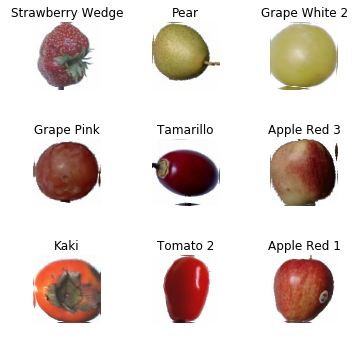

In [9]:
data.show_batch(rows=3, figsize=(5,5))

In [10]:
print(data.classes)
len(data.classes),data.c

['Apple Braeburn', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Red', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Clementine', 'Cocos', 'Dates', 'Granadilla', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Huckleberry', 'Kaki', 'Kiwi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Maracuja', 'Melon Piel de Sapo', 'Mulberry', 'Nectarine', 'Orange', 'Papaya', 'Passion Fruit', 'Peach', 'Peach Flat', 'Pear', 'Pear Abate', 'Pear Monster', 'Pear Williams', 'Pepino', 'Physalis', 'Physalis with Husk', 'Pineapple', 'Pineapple Mini', 'Pitahaya Red', 'Plum', 'Pomegranate', 'Quince', 'Rambutan', 'Raspberry', 'Salak', 'Strawberry',

(81, 81)

### Creating the model using Resnet34 architecture pretrained with ImageNet data 

In [11]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

### Training the model

learn.fit_one_cycle(3)

In [13]:
learn.save('fruit-model1')

### Interpreting misclassified data

In [14]:
interp = ClassificationInterpretation.from_learner(learn)

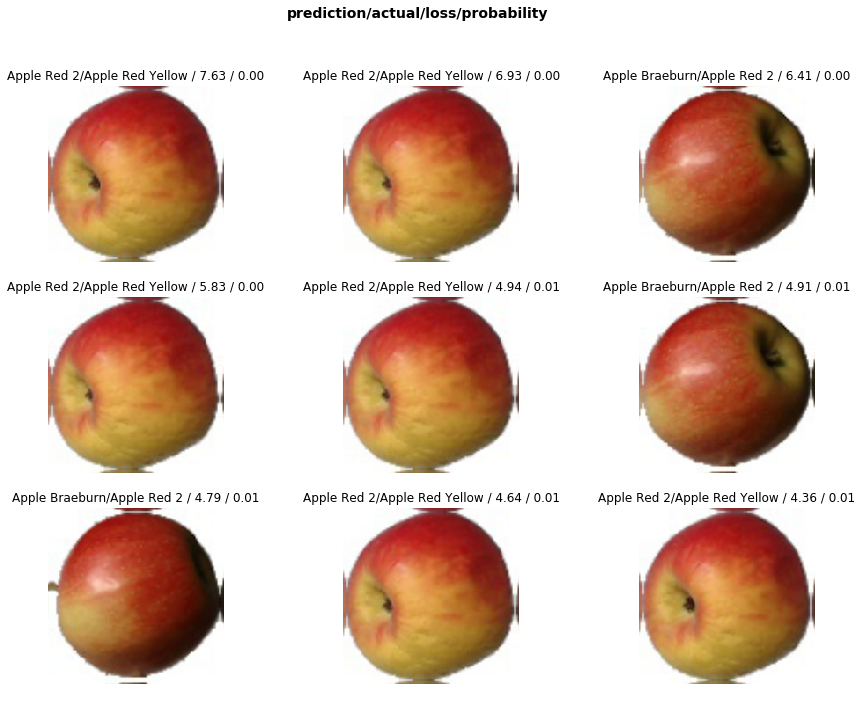

In [15]:
interp.plot_top_losses(9, figsize=(15,11))

In [16]:
interp.most_confused(min_val=2)

[('Cherry 2', 'Cherry 1', 56),
 ('Cherry 1', 'Cherry 2', 55),
 ('Apple Red 2', 'Apple Braeburn', 36),
 ('Apple Red Yellow', 'Apple Red 2', 23),
 ('Pepino', 'Cherry Wax Yellow', 7),
 ('Pepino', 'Peach Flat', 6)]

In [17]:
learn.unfreeze()

In [18]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.013967,0.022934,0.008792


### Learning rate finder

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [20]:
learn.recorder.plot()

### Unfreezing the model to train all the layers

In [22]:
learn.unfreeze()
learn.fit_one_cycle(3, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate
1,0.011421,0.019521,0.009728
2,0.011929,0.020826,0.009440
3,0.008573,0.023173,0.009440


In [23]:
interp = ClassificationInterpretation.from_learner(learn)

In [24]:
interp.most_confused(min_val=2)

[('Cherry 2', 'Cherry 1', 62),
 ('Cherry 1', 'Cherry 2', 53),
 ('Pepino', 'Peach Flat', 11),
 ('Strawberry Wedge', 'Avocado ripe', 3)]

In [25]:
learn.save('fruit-model2')